In [2]:
import dropbox
import os
import numpy as np
import pandas as pd
from scipy.stats import t
import math
import collections
from PIL import Image
from dropbox import DropboxOAuth2FlowNoRedirect
import matplotlib.pyplot as plt
import cv2

## Xception Model

![title](xception.jpg)

'channels_last' $\implies$ (height, width, channels) <br/>
input size $\implies$ 299x299 <br/>

Our images are 1500x1969

https://gist.github.com/fchollet/f35fbc80e066a49d65f1688a7e99f069

transfer learning = https://www.kaggle.com/abnera/transfer-learning-keras-xception-cnn

In [2]:
from keras.applications.xception import Xception
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


25000
6YAL71227JK480


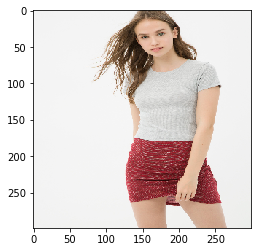

25000
25001
6YAL71227JK740


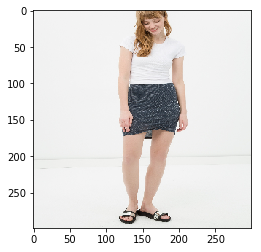

25001
25002
6YAL71228AA038


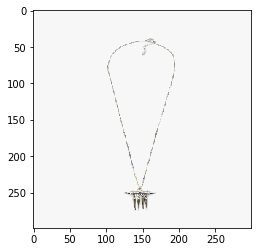

25002
25003
6YAL71228JK740


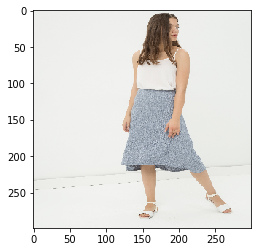

25003
25004
6YAL71229AA038


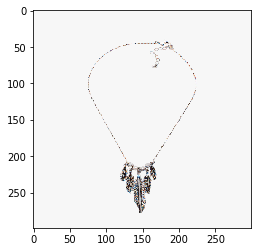

25004
25005
6YAL71229JKM16


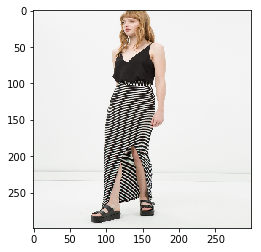

25005
25006
6YAL71230AA038


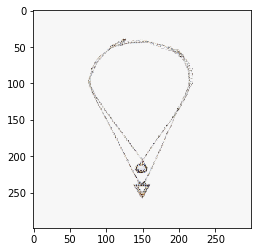

25006
25007
6YAL71230JK94G


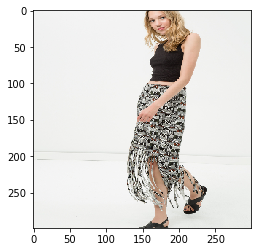

25007
25008
6YAL71231AA038


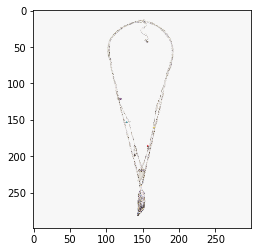

25008
25009
6YAL71232AA038


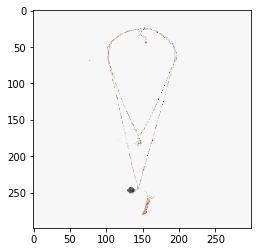

25009


In [5]:
retrieved_image_df = pd.read_excel('C:/Users/Recep/Koton/Data/retrieved_image_list.xlsx', sheet_name='Sheet1')
access_token='0DQLcsXIojcAAAAAAAgybeB3DOmXKK7bRTLyYwkthbrAiGmpQR4AuGINQkjBXhif'
dbx = dropbox.Dropbox(access_token)
im_type = ['image1', 'image2', 'image3', 'image4', 'image5']
data_x = []
y_dummy = np.array([15, 21, 2, 6, 5])
codes = []

nb_train_samples = 10
batch_size = 5
count = 0

dt = np.dtype(int)
dt = dt.newbyteorder('>')

for i in range(25000  , 25000 + nb_train_samples):
    try:
        print(i)
        code = retrieved_image_df.iloc[i].name
        print(code)
        im_index = retrieved_image_df.iloc[i][im_type[0]+'_index']
        codes.append(code)
        filename = str(code)+'_'+im_type[0]+'_'+str(int(im_index))+'.jpg'
        path = '/Koton_Image_Files/'+filename
        md, res = dbx.files_download(path)
        data_x.append(cv2.resize(cv2.imdecode(np.frombuffer(res.content, dtype=np.uint8), -1), (299,299)))
        plt.imshow(cv2.cvtColor(cv2.resize(cv2.imdecode(np.frombuffer(res.content, dtype=np.uint8), -1), (299,299)), cv2.COLOR_BGR2RGB))
        plt.show()
        print(i)
    except Exception as e: 
        print(e)
        count += 1
        

In [31]:
i = 59999
code = retrieved_image_df.iloc[i].name
im_index = retrieved_image_df.iloc[i][im_type[0]+'_index']

In [32]:
code

'7YAM15203LK617'

In [32]:
codes CODE LIKE '6YKG17773AK03A%' or CODE LIKE '6YKG17771OK000%'

['6YKG17771OK000',
 '6YKG17772AK18Z',
 '6YKG17773AK03A',
 '6YKG17776AK001',
 '6YKG17777AK002',
 '6YKG17786AK13K',
 '6YKG17790AK001',
 '6YKG17791AK999',
 '6YKG17795AK155',
 '6YKG17795AK250']

In [39]:
a = ['as', 'be']
b = ""

In [52]:
count

10

In [38]:
CODE LIKE '6YKG17773AK03A%' or CODE LIKE '6YKG17771OK000%'

AttributeError: 'list' object has no attribute 'elements'

In [16]:
_ =[]
flag = True
for i in codes:
    if flag:
        _.append("CODE LIKE '"+i+"%'")
        flag = False
    else:
         _.append(" or CODE LIKE '"+i+"%'")

In [34]:
codes

['7YAM15203LK617',
 '7YAM15203LK618',
 '7YAM15203LK645',
 '7YAM15203LK751',
 '7YAM15210OK000',
 '7YAM15210OK999',
 '7YAM15224OK027',
 '7YAM15237LK000',
 '7YAM15237LK023',
 '7YAM15237LK600',
 '7YAM15237LK660']

In [4]:
''.join(_)

''

In [ ]:
['6YKG17771OK000',
 '6YKG17772AK18Z',
 '6YKG17773AK03A',
 '6YKG17776AK001',
 '6YKG17777AK002',
 '6YKG17786AK13K',
 '6YKG17790AK001',
 '6YKG17791AK999',
 '6YKG17795AK155',
 '6YKG17795AK250']

In [41]:
codes

['7YAM15203LK617',
 '7YAM15203LK618',
 '7YAM15203LK645',
 '7YAM15203LK751',
 '7YAM15210OK000',
 '7YAM15210OK999',
 '7YAM15224OK027',
 '7YAM15237LK000',
 '7YAM15237LK023',
 '7YAM15237LK600',
 '7YAM15237LK660']

In [5]:
cv2.cvtColor(data_x[0], cv2.COLOR_BGR2RGB).shape

(299, 299, 3)

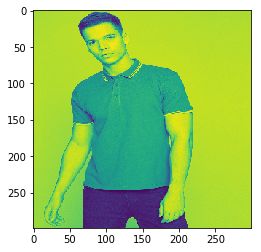

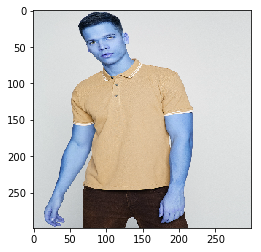

In [11]:
# _ = np.reshape(data_x[4], (299, 299, 1))
plt.imshow(cv2.cvtColor(data_x[0], cv2.COLOR_BGR2RGB)[:,:,0])
plt.show()
plt.imshow(data_x[0])
plt.show()


In [66]:
data_x[0].shape

(299, 299, 3)

In [55]:
data_x[1].shape

(299, 299, 3)

In [11]:
data = np.array(data_x)

In [12]:
def save_bottlebeck_features():
#     datagen = ImageDataGenerator(rescale=1. / 255)

    model = Xception(include_top=False, weights='imagenet')

    bottleneck_features_train = model.predict(data)
    np.save(open('bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)

#     generator = datagen.flow_from_directory(
#         validation_data_dir,
#         target_size=(img_width, img_height),
#         batch_size=batch_size,
#         class_mode=None,
#         shuffle=False)
#     bottleneck_features_validation = model.predict_generator(
#         generator, nb_validation_samples // batch_size)
#     np.save(open('bottleneck_features_validation.npy', 'w'),
#             bottleneck_features_validation)

In [13]:
save_bottlebeck_features()

In [23]:
def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
    train_labels = y_dummy

#     validation_data = np.load(open('bottleneck_features_validation.npy'))
#     validation_labels = np.array(
#         [0] * (nb_validation_samples / 2) + [1] * (nb_validation_samples / 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='adam',
                  loss='mean_squared_error', metrics=['mae'])

    model.fit(train_data, train_labels,
              epochs=10,
              validation_data=(train_data, y_dummy))
#     model.save_weights(top_model_weights_path)

IndentationError: unexpected indent (<ipython-input-23-eb206aadf28d>, line 2)

https://github.com/keras-team/keras/issues/1330
https://keras.io/getting-started/functional-api-guide/#multi-input-and-multi-output-models

In [17]:
_ = [12, 21, 36]*5
ek_data = np.array(_)

In [18]:
ek_data = ek_data.reshape((5,3))

In [19]:
train_data.shape

(5, 10, 10, 2048)

In [21]:
train_data.shape[1:]

(10, 10, 2048)

In [20]:
    from keras.layers import concatenate, Input
    from keras.models import Model
    
    train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
    train_labels = y_dummy

    first_input = Input(shape=train_data.shape[1:])
    first = Flatten()(first_input)
    
    second_input = Input(shape=(3,))
    second = Dense(3, activation='relu')(second_input)

    
    model = concatenate([first, second], axis=1)
#     Bu arada yeni inputlarin baglanmasi lazim
    model = Dense(256, activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Dense(1, activation='relu')(model)
    
    model_ = Model(inputs=[first_input, second_input], outputs=model)

    model_.compile(optimizer='adam',
                  loss='mean_squared_error', metrics=['mae'])
    
    

    model_.fit([train_data, ek_data], train_labels,
              epochs=10,
              validation_data=([train_data, ek_data], y_dummy))

Train on 5 samples, validate on 5 samples
Epoch 1/10
5/5 [==============================] - 4s 828ms/step - loss: 146.2000 - mean_absolute_error: 9.8000 - val_loss: 146.2000 - val_mean_absolute_error: 9.8000
Epoch 2/10
5/5 [==============================] - 1s 221ms/step - loss: 146.2000 - mean_absolute_error: 9.8000 - val_loss: 146.2000 - val_mean_absolute_error: 9.8000
Epoch 3/10
5/5 [==============================] - 1s 221ms/step - loss: 221.5734 - mean_absolute_error: 13.5800 - val_loss: 146.2000 - val_mean_absolute_error: 9.8000
Epoch 4/10


KeyboardInterrupt: 

In [46]:
len(set([train_data, ek_data])) != len([train_data, ek_data])

TypeError: unhashable type: 'numpy.ndarray'

In [20]:
train_top_model()

Train on 10 samples, validate on 10 samples
Epoch 1/10
10/10 [==============================] - 5s 497ms/step - loss: 146.2000 - mean_absolute_error: 9.8000 - val_loss: 146.2000 - val_mean_absolute_error: 9.8000
Epoch 2/10
10/10 [==============================] - 1s 102ms/step - loss: 146.2000 - mean_absolute_error: 9.8000 - val_loss: 146.2000 - val_mean_absolute_error: 9.8000
Epoch 3/10
10/10 [==============================] - 1s 103ms/step - loss: 146.2000 - mean_absolute_error: 9.8000 - val_loss: 146.2000 - val_mean_absolute_error: 9.8000
Epoch 4/10
10/10 [==============================] - 1s 108ms/step - loss: 103.7598 - mean_absolute_error: 8.1023 - val_loss: 13679421.0000 - val_mean_absolute_error: 3673.7402
Epoch 5/10
10/10 [==============================] - 1s 107ms/step - loss: 13417875.0000 - mean_absolute_error: 3624.3157 - val_loss: 146.2000 - val_mean_absolute_error: 9.8000
Epoch 6/10
10/10 [==============================] - 1s 105ms/step - loss: 146.2000 - mean_absolute_e